# **If on Colab**

Please click on the bage and then run the code below

You might see a warning to Restart the Runtime. This is expected. Just go to the `Kernel`  tab and click on `Restart runtime`.

You only have to do this once per notebook on Google Colab.

# Looking at the dimuon spectrum over a wide energy range

<h3>Learning goals</h3>
<ul>
    <li>Relativistic kinematics.
    <li>Mesons.
</ul>

<b>Background</b>

To determine the mass ($m$) of a particle you need to know the 4-momenta of the particles ($\mathbf{P}$) that are detected after the collision: the energy ($E$), the momentum in the x direction ($p_x$), the momentum in the y direction ($p_y$), the momentum in the z direction ($p_z$).

$$\mathbf{P} = (E,p_x,p_y,p_z)$$


\begin{equation*} m = \sqrt{E^2-(p_x^2+p_y^2 + p_z^2)} \end{equation*}

Some particles are very unstable and decay (turn into) to two or more other particles. In fact, they can decay so quickly, that they never interact with your detector! Yikes!

However, we can reconstruct the parent particle (sometimes referred to as <b>the initial state particle</b>) and its 4-momentum by adding the 4-momenta of the child particles (sometimes referred to as <b>the decay products</b>). 

$$\mathbf{P_{\rm parent}} = \mathbf{P_{\rm child 0}} + \mathbf{P_{\rm child 1}} + \mathbf{P_{\rm child 2}} + ...$$



which breaks down into...

$$E_{\rm parent} = E_{\rm child 0} + E_{\rm child 1} + E_{\rm child 2} + ...$$

$$p_{\rm x parent} = p_{\rm x child 0} + p_{\rm x child 1} + p_{\rm x child 2} + ...$$

$$p_{\rm y parent} = p_{\rm y child 0} + p_{\rm y child 1} + p_{\rm y child 2} + ...$$

$$p_{\rm z parent} = p_{\rm z child 0} + p_{\rm y child 1} + p_{\rm z child 2} + ...$$


<b>Let's code!</b>

Here is some very, very basic starter code. It reads in data from the CMS experiment. 
 


<h2><font color="red">Challenge!</font></h2>

Use the sample code to find the mass of the particle that the two muons came from (parent particle). 

To do this, you will need to loop over all pairs of muons for each collision, sum their 4-momenta (energy, px, py, and pz) and then use that to calculate the invariant mass. 

Do this for all possible pairs and in addition, break it down so that you calculate the invariant mass for the cases where:
* Both muons are positively charged.
* Both muons are negatively charged.
* The muons have opposite charges.

Be careful. Some collisions may have more than 2 muons, so write your code such that it calculates all possible pairs of muons in a given collisions. For example, if there are 3 muons in a collision, there are 3 possible pairs that you can make. 

<i>Hint!</i>

It is very likely that a particle exists where there is a peak in the data. However, this is not always true. 
A peak in the data is most likely the mass of a particle. You can look at the approximate mass to figure out which particle 
is found in the data.

Your histogram should look something like the following sketch. The value of the peaks should be the mass of a particle. You should be able to find two particles in their ground state. <a href="http://en.wikipedia.org/wiki/J/psi_meson">Check your answer for the first particle!</a> <a href="http://en.wikipedia.org/wiki/Upsilon_meson">Check your answer for the second particle!</a> 

In [1]:
from IPython.display import Image
Image(url='https://raw.githubusercontent.com/particle-physics-playground/playground/master/activities/images/dimuons_sketch.jpeg')

In [50]:
import numpy as np
import h5py
import awkward as ak
import matplotlib.pyplot as plt
import mplhep as hep

In [458]:
plt.style.use("default")

In [480]:
hep.style.use("ROOT")

In [481]:
event=h5py.File('data/dimuon100k.hdf5',mode='r')

In [482]:
e=event['muons/e'][:]
px =event['muons/px'][:]
py =event['muons/py'][:]
pz =event['muons/pz'][:]

print(len(px))
# see if there are any anomalies and clean them out
cut=(e**2 - (px**2 + py**2 + pz**2)) <0

print(sum(cut)) #count how many anomalies

200000
343


We can use numpy to clean our arrays from anomalous events

In [230]:
e=np.delete(e,cut)
px,py,pz=np.delete(px,cut),np.delete(py,cut),np.delete(pz,cut)

In [483]:
# let's calculate the mass
M=np.abs(e**2 - (px**2 + py**2 + pz**2))**.5

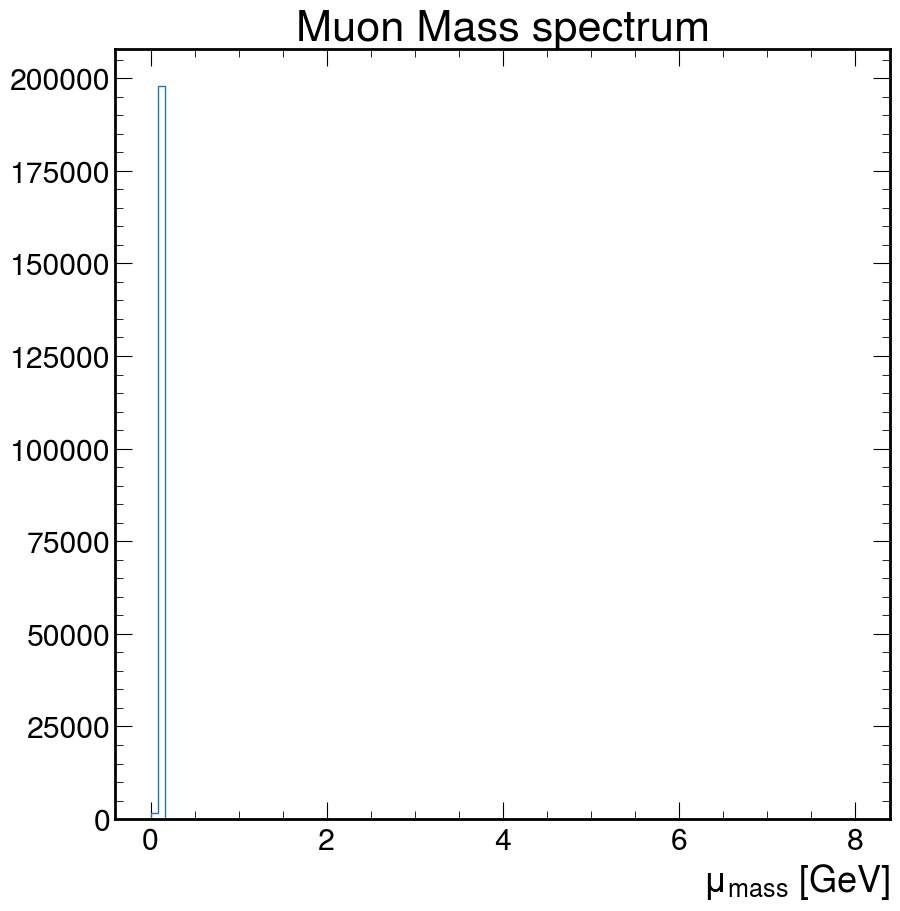

In [484]:
plt.hist(M,bins=100,
         histtype='step',
        )

plt.xlabel('$\mu_{mass}$ [GeV]')
plt.title('Muon Mass spectrum')
plt.show()

## Excercise :
Using our knowledge so far, fix the above plot to **visually** estimate the mass of the muon

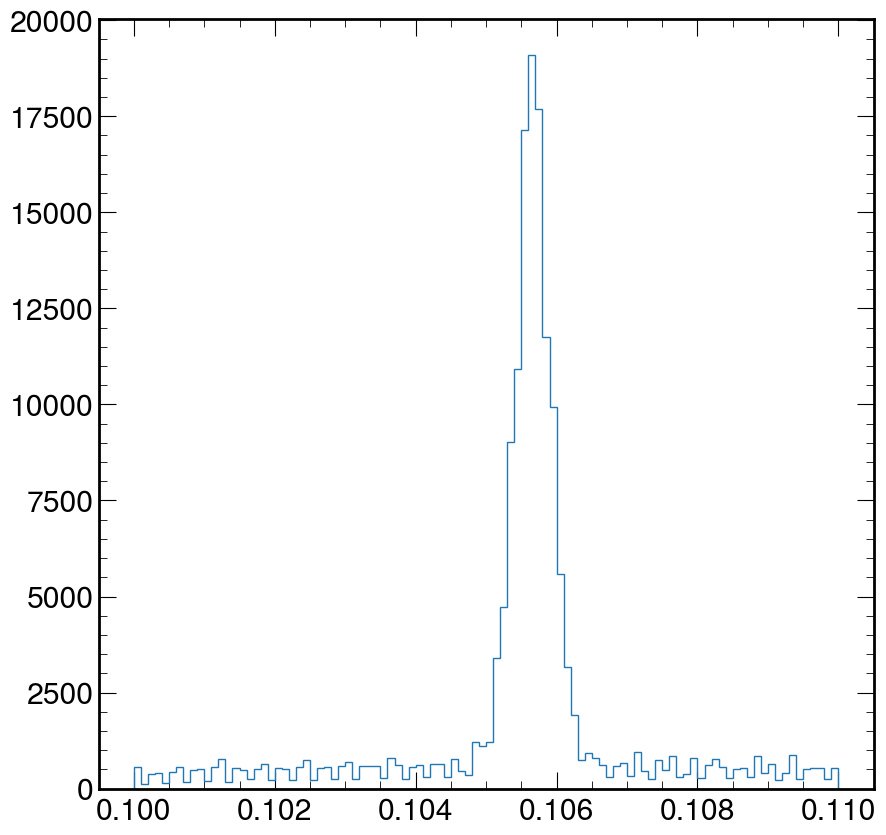

In [485]:
plt.hist(M,bins=100,log=False,
         histtype='step',range=(0.1,0.11)
        )
plt.show()

# Let's make the dimuon spectrum

We need to calculate the sum the energies at the event level 


**REMEMBER** 
$$E_{\rm parent} = E_{\rm child 0} + E_{\rm child 1} + E_{\rm child 2} + ...$$

$$p_{\rm x parent} = p_{\rm x child 0} + p_{\rm x child 1} + p_{\rm x child 2} + ...$$

$$p_{\rm y parent} = p_{\rm y child 0} + p_{\rm y child 1} + p_{\rm y child 2} + ...$$

$$p_{\rm z parent} = p_{\rm z child 0} + p_{\rm y child 1} + p_{\rm z child 2} + ...$$

Let's assume that each event only has 2 muons.
We will use the awkward arrays function `unflatten` because we can make pairs of muons this way.

In [486]:
ake=ak.unflatten(e,2)
akpx=ak.unflatten(px,2)
akpy=ak.unflatten(py,2)
akpz=ak.unflatten(pz,2)


Now lets sum the 4-momenta components and calculate the event mass

In [487]:
# we use axis = 1 because it squishes the row dimension and gives us 1 value per row (i.e. 1 value per event)
e = np.sum(ake,axis=1) 
px = np.sum(akpx,axis=1)
py = np.sum(akpy,axis=1)
pz = np.sum(akpz,axis=1)

Now calculate the mass per event

In [576]:
# Mass=(e**2-(px**2+py**2+pz**2))**.5

Mass=np.sqrt((e**2-(px**2+py**2+pz**2)))

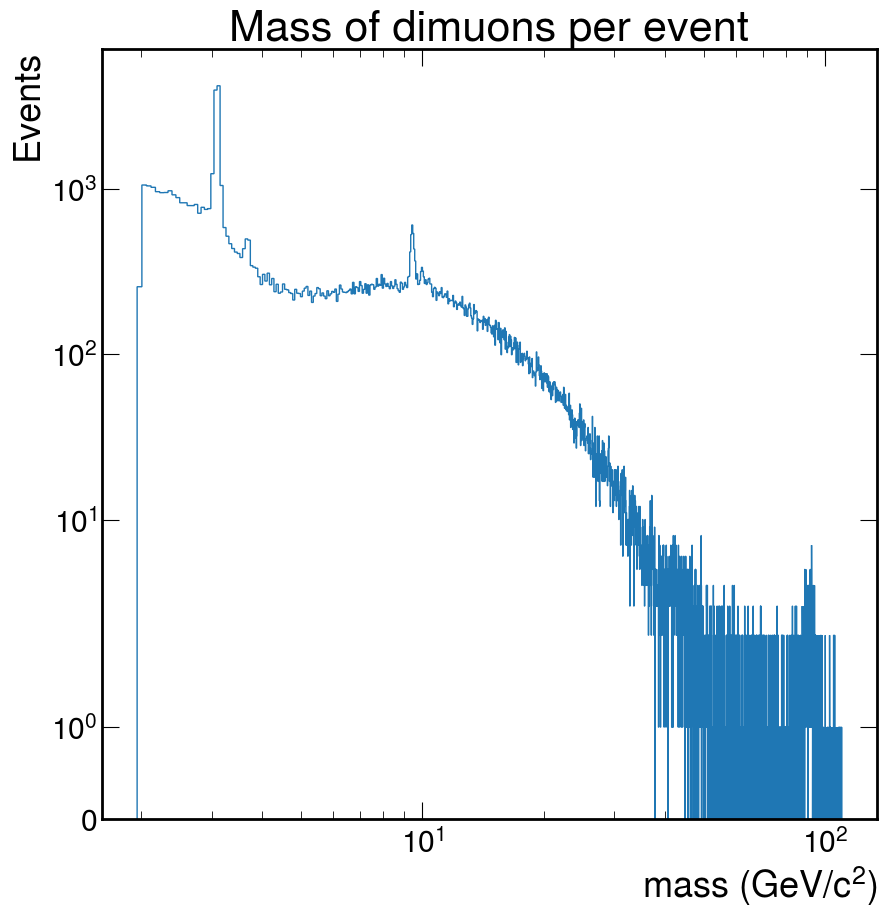

In [638]:

plt.hist(Mass,bins=2000,
         histtype='step')

plt.xlabel('mass (GeV/$c^2$)')
plt.ylabel('Events')
plt.yscale('symlog')
plt.xscale('log')
plt.title('Mass of dimuons per event')
plt.autoscale()

# plt.savefig('Dimuon_mass.jpeg',dpi=500,optimize=True)
plt.show()


Depending on what you did, you may see hints of particles below 20 GeV/c$^2$. It is possible you see signs of other particles at even higher energies. Plot your masses over a wide range of values, but then zoom in (change the plotting range) on different mass ranges to see if you can identify these particles.  

In [632]:
Image(url='https://twiki.cern.ch/twiki/pub/CMSPublic/HLTDiMuon2017and2018/CMS_HLT_DimuonMass_Inclusive_2017.png')